In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

#Serbia's Response to COVID-19
######Dennis Djunic

The current COVID-19 pandemic has shown to be one of the world’s defining health crises. The virus has rapidly spread across the world, effecting each person’s individual life in numerous ways. Governments have tried several tactics to slow the spread of the virus, such as lockdowns, social distancing, and mask mandates. Even though some countries have managed to control the spread of the virus, the overall case counts have been increasing at exponential rates all around the world. At first, Serbia had a large initial spike in cases. They were then able to get the spread under control through the implementation of restrictions across the country; however, a second wave of cases occurred after restrictions on business and gathering were lifted.

In [13]:
locations = pd.read_csv('locations.csv')
location = locations.loc[locations['location'] == 'Serbia']

In [14]:
big_corona_data = pd.read_csv('owid-covid-data.csv', parse_dates= ['date'], index_col= ['date'])
big_corona_data = big_corona_data['2020-03-01': '2020-09-02']

In [15]:
SRB_corona = big_corona_data.loc[big_corona_data['iso_code'] == 'SRB']

In [16]:
date_form = DateFormatter("%m-%Y")
locator = mdates.MonthLocator(interval=1)
sns.set()

In [17]:
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

###General Trends in Serbia's COVID-19 cases

Serbia’s response at the beginning of the pandemic was quickly executed. In Serbia, the first case was reported on March 6th. Consequently, on March 15th a state of emergency was declared, and the country was immediately shut down. As cases continued to rise, the government-imposed curfews. Only groups of two people were allowed in public areas, while individuals over the age of sixty-five were not allowed to leave their house. These severe restrictions had an impact on the case count, resulting in the new daily case rate decreasing at the end of April. With a decline in cases, the Serbian government decided to begin relaxing restrictions by allowing businesses to open, lifting curfews, and permitting large gatherings by June 1st. Not long after restrictions lifted, Serbia began to see an enormous spike in cases that was larger than the first wave. The death toll dramatically increased, but this time the government was slow to react. Some restrictions were implemented on the size of public gatherings, but the restrictions were nowhere near as extreme as those during the first wave. This could be in part because Serbians were becoming restless, and when President Vučič called for another round of shutdowns and curfews, thousands started protesting. Protests caused cases to continue to rise and a peak of 467 new cases in one day was eventually reached. Then, the number of cases started to decline. This decline was more gradual than the decrease in cases that occurred after the strict lockdowns from the first wave. Present day, Serbia has the second wave under control; however, the country remains at risk of making the same mistake they previously did after lifting restrictions the first time.

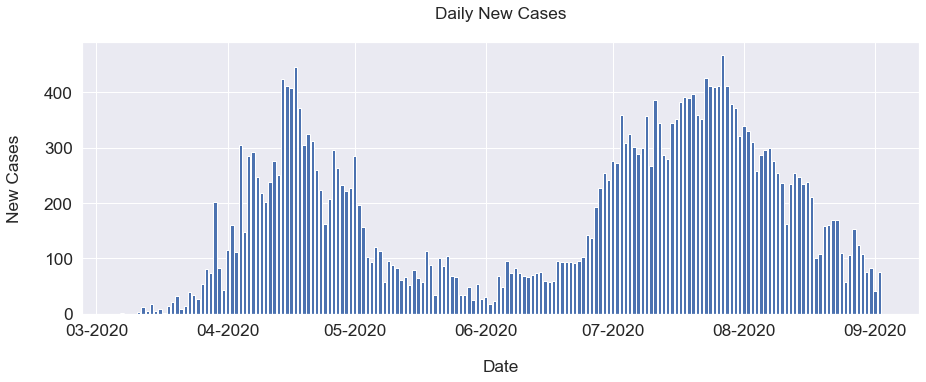

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(SRB_corona.index.values, SRB_corona['new_cases'], color = 'b')
ax.set(xlabel="\nDate",
       ylabel="New Cases\n",
       title="Daily New Cases\n")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(locator)

plt.show()




###Comparing Serbia to other European Countries adjusted for population: Coratia, France, Greece, and Italy.

In [19]:
more_countries_corona_data = big_corona_data.loc[big_corona_data['iso_code'].isin(['GRC', 'HRV', 'SRB', 'FRA', 'ITA'])]


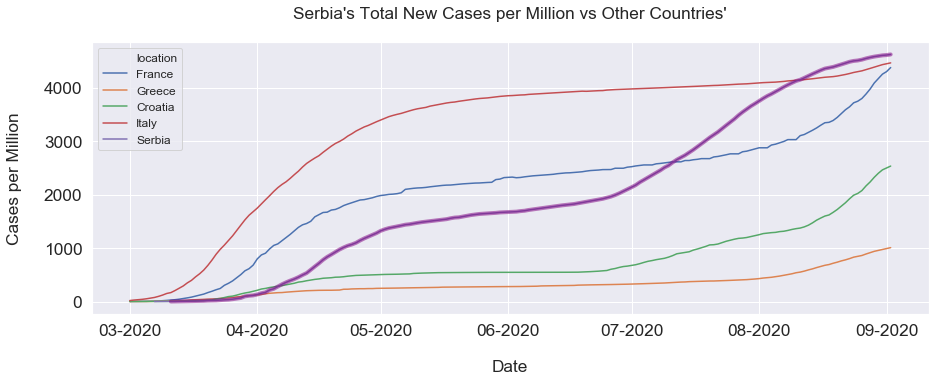

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x = more_countries_corona_data.index.values, y = more_countries_corona_data['total_cases_per_million'],
             hue = more_countries_corona_data['location'])
plt.plot(SRB_corona.index.values, SRB_corona['total_cases_per_million'], marker='', color='purple', linewidth=4, alpha=0.5)
ax.set(xlabel="\nDate",
       ylabel="Cases per Million\n",
       title="Serbia's Total New Cases per Million vs Other Countries'\n")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(locator)
plt.show()



Croatia and Greece have a similar population and GDP to Serbia but have been able to better handle the virus. This comes down to two main factors: pre-existing conditions and government response. The life expectancy, median age, and number of male and female smokers are very similar in these three countries; however, the diabetes prevalence and cardiovascular death rate greatly differ. Serbia’s diabetes and cardiovascular death rates are almost twice as high as those in Croatia and Greece, which could be why the deaths per million is much higher for Serbia than it is for Croatia and Greece. However, Greece and Croatia also have a significantly lower total number of COVID cases than Serbia, which could be the result of a better government responses. Both countries followed a similar timeline to Serbia during the beginning stages of the pandemic, a strict lockdown was imposed where schools, businesses, and travel were all shut down. However, even during this stage, Greece and Croatia were able to keep their case counts much lower than Serbia by applying restrictions on travel within each country. Greece set up roadblocks on major roadways to restrict travel. This extreme lockdown is one of the main reasons why Greece has not experienced a large spike in cases and has been praised by many leaders as having one of the best responses in Europe; however, Greece has experienced some side effects with the implementation of their lockdown. Tourism is one of Greece’s largest revenue generators, an industry that has been almost entirely destroyed this summer to an extent that remains unknown. Greece recently recovered from a debt crisis that lasted decades. With a combination of the debt crisis and the lack of tourism this year, it will be interesting to see how the Greek economy continues to recover. Croatia has delayed the start of second wave cases, but now looks to be making the same mistakes Serbia did. As restrictions are lifted, cases are beginning to increase similar to Serbia. If something is not done to contain the spread soon, Croatia will see a large second wave of cases.

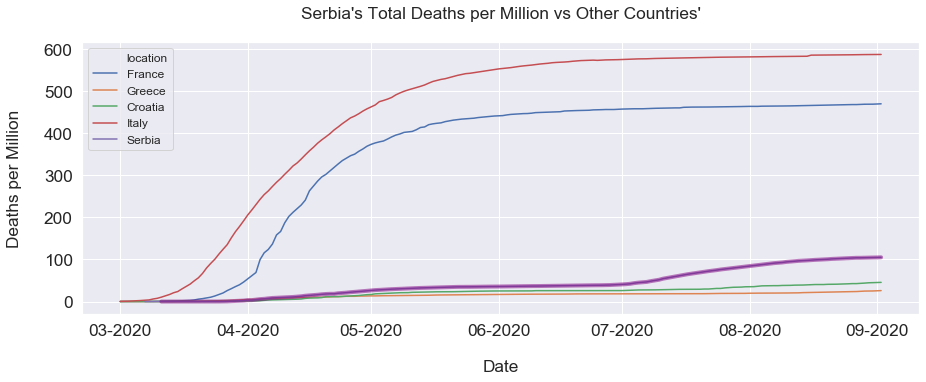

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x = more_countries_corona_data.index.values, y = more_countries_corona_data['total_deaths_per_million'],
             hue = more_countries_corona_data['location'])
plt.plot(SRB_corona.index.values, SRB_corona['total_deaths_per_million'], marker='', color='purple', linewidth=4, alpha=0.5)
ax.set(xlabel="\nDate",
       ylabel="Deaths per Million\n",
       title="Serbia's Total Deaths per Million vs Other Countries'\n")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(locator)
plt.show()

When comparing Serbia’s response to those of larger, more powerful European countries such as France and Italy, a drastic difference in death rate, but a similar plot of total cases adjusted for population is seen. Serbia recently had the most cases per million out of the chosen countries. Italy was the first European country to get hit by Covid-19 and led the world in total number of cases at one point. France was not far behind Italy, and both countries implemented strict government-imposed lockdowns to try and slow the spread of the virus. During Italy’s surge in cases, the death rate was approaching almost ten percent: the highest in the world by a considerable margin. Italy was used as an example of how not to handle the pandemic and represented a worst-case scenario for other countries. Comparing total deaths per million with Serbia, both Italy and France have 5 to 6 times the deaths than Serbia. This is an interesting statistic because individuals often discuss the quality of healthcare offered as one of the best ways to prevent COVID deaths. Italy and France have higher quality healthcare available to people than Serbia does. One explanation for the discrepancy in deaths, could be how the elderly live once they are retired. In Serbia, the majority of seniors do not end up in nursing homes, thus not many exist. In contrast, France and Italy both have sizable nursing home populations that have been linked to a large percentage of COVID deaths. The initial government response in all three of these countries was similar: strict government lockdowns that restricted public gatherings and shut down businesses. Serbia was the first country to lift lockdowns and has seen a second wave of cases larger than the first. France recently lifted restrictions, allowing events with greater numbers of people such as the Tour de France. Since lockdowns have been eased, France is seeing a spike in cases, similar to Serbia. 

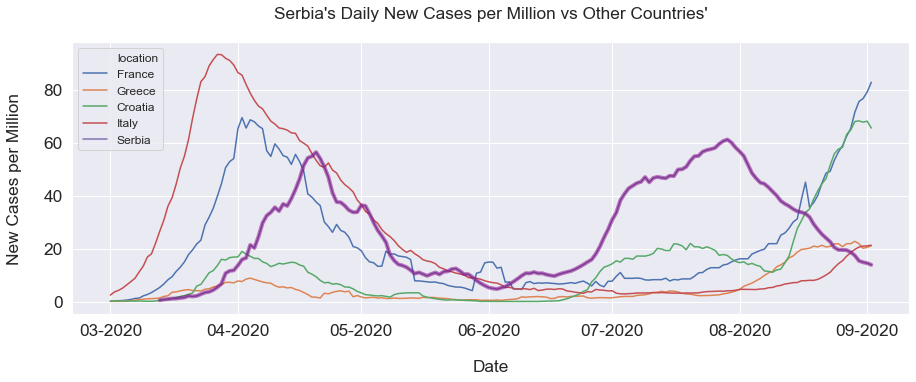

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x = more_countries_corona_data.index.values, y = more_countries_corona_data['new_cases_smoothed_per_million'],
             hue = more_countries_corona_data['location'])
plt.plot(SRB_corona.index.values, SRB_corona['new_cases_smoothed_per_million'], marker='', color='purple', linewidth=4, alpha=0.5)
ax.set(xlabel="\nDate",
       ylabel="New Cases per Million\n",
       title="Serbia's Daily New Cases per Million vs Other Countries'\n")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(locator)
plt.show()


###Conclusion

Serbia’s coronavirus response has not been as good as it could have been. They were able to slow the initial case spike but failed at keeping the virus under control when a larger second wave swept through the country. Similar countries have done a sounder job to slow the spread of the virus through having a healthier population and government actions. For now, this has let Greece and Italy avoid a second wave of the virus. However, the data demonstrates that once strict lockdowns are eased and larger gatherings are allowed, cases start to increase. This has happened in Serbia, France, Croatia, and many other countries including the United States. Obviously, indefinite lockdowns are not an option, but a more cautious way of reopening must be thought of to control the spread of the virus and citizens need to take responsibility for their health and the health of others to prevent countries from suffering from multiple waves of COVID-19.